In [ ]:
                                    #CUSTOMER CHURN PREDICTION 

In [1]:
!pip install xgboost

In [2]:
import xgboost as xgb
print(xgb.__version__)

2.1.4


In [3]:
#Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [5]:
#Load and Explore the Data

In [6]:
df = pd.read_csv("Telco-Customer-Churn.csv")  

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,6579-JPICP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.4,No
495,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.6,Yes
496,4134-BSXLX,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
494,6579-JPICP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.4,No
495,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.6,Yes
496,4134-BSXLX,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No
498,6235-VDHOM,Female,1,No,No,5,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,28.45,131.05,Yes


In [10]:
df.shape

(499, 21)

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        499 non-null    object 
 1   gender            499 non-null    object 
 2   SeniorCitizen     499 non-null    int64  
 3   Partner           499 non-null    object 
 4   Dependents        499 non-null    object 
 5   tenure            499 non-null    int64  
 6   PhoneService      499 non-null    object 
 7   MultipleLines     499 non-null    object 
 8   InternetService   499 non-null    object 
 9   OnlineSecurity    499 non-null    object 
 10  OnlineBackup      499 non-null    object 
 11  DeviceProtection  499 non-null    object 
 12  TechSupport       499 non-null    object 
 13  StreamingTV       499 non-null    object 
 14  StreamingMovies   499 non-null    object 
 15  Contract          499 non-null    object 
 16  PaperlessBilling  499 non-null    object 
 1

In [13]:
df.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
print(df.describe())

       SeniorCitizen      tenure  MonthlyCharges
count     499.000000  499.000000      499.000000
mean        0.168337   31.492986       65.906313
std         0.374540   24.424407       29.545447
min         0.000000    0.000000       18.950000
25%         0.000000    8.000000       44.150000
50%         0.000000   28.000000       71.150000
75%         0.000000   52.500000       89.900000
max         1.000000   72.000000      116.050000


In [16]:
#Perform data Visualization

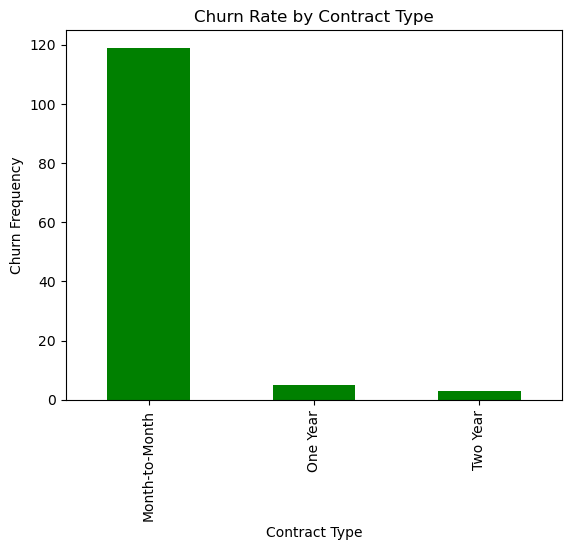

In [17]:
#BAR CHART
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
churn_counts = df[df["Churn"] == 1]["Contract"].value_counts()

# Rename index for better readability (optional, modify based on actual contract names)
churn_counts.index = ['Month-to-Month', 'One Year', 'Two Year']

# Plot the bar chart
churn_counts.plot(kind='bar', color='Green')

# Labels and title
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Frequency")
plt.show()

(-1.099981621087029,
 1.099999124813668,
 -1.0999827002480214,
 1.0999991719201598)

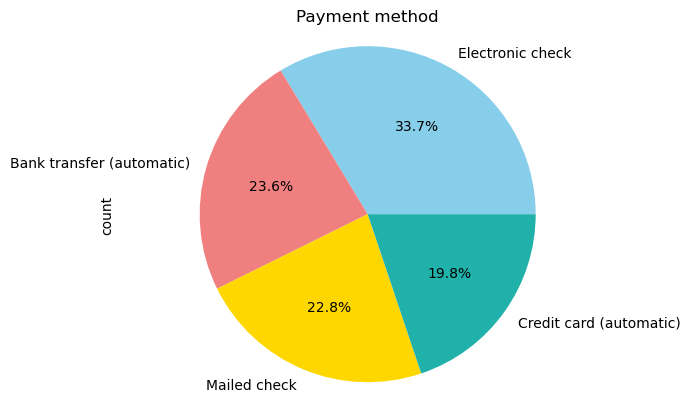

In [18]:
#PIE CHART
churn_counts=df["PaymentMethod"].value_counts()
churn_counts.plot(kind='pie',autopct='%1.1f%%',colors=['skyblue', 'lightcoral', 'gold', 'lightseagreen'])
plt.title('Payment method')
plt.axis('equal')

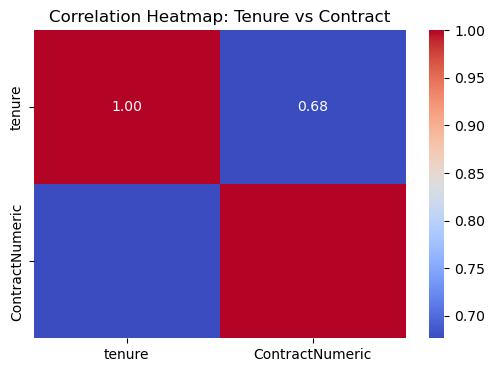

In [19]:
#HEAT MAP
contract_mapping = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
df['ContractNumeric'] = df['Contract'].map(contract_mapping)

# Select relevant columns for heatmap
correlation_data = df[['tenure', 'ContractNumeric']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Tenure vs Contract")
plt.show()

In [20]:
#Data Preprocessing

In [21]:
df.drop("customerID", axis=1, inplace=True)

In [22]:
# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [23]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Logistic Regression Model

In [41]:
# Train Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Make predictions
y_pred_lr = lr.predict(X_test)

In [42]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [30]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.4f}")
print("Confusion Matrix:\n", conf_matrix_lr)

Logistic Regression Accuracy: 0.7600
Logistic Regression ROC-AUC: 0.6806
Confusion Matrix:
 [[62 10]
 [14 14]]


In [31]:
#Random Forest Model

In [32]:
# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf.predict(X_test)

In [33]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [34]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.4f}")
print("Confusion Matrix:\n", conf_matrix_rf)

Random Forest Accuracy: 0.7600
Random Forest ROC-AUC: 0.6478
Confusion Matrix:
 [[65  7]
 [17 11]]


In [35]:
#XGBoost Model

In [36]:
# Train XGBoost Model
xgb = XGBClassifier(eval_metric="logloss")
xgb.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb.predict(X_test)

In [37]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

In [38]:
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost ROC-AUC: {roc_auc_xgb:.4f}")
print("Confusion Matrix:\n", conf_matrix_xgb)

XGBoost Accuracy: 0.7400
XGBoost ROC-AUC: 0.6667
Confusion Matrix:
 [[60 12]
 [14 14]]


In [39]:
#Model Comparison

In [40]:
model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_lr,accuracy_rf,accuracy_xgb],
    "ROC-AUC": [roc_auc_lr,roc_auc_rf,roc_auc_xgb],
    "Confusion_matrix": [conf_matrix_lr,conf_matrix_rf,conf_matrix_xgb]
})

print(model_results.sort_values(by="Accuracy", ascending=False))

                 Model  Accuracy   ROC-AUC      Confusion_matrix
0  Logistic Regression      0.76  0.680556  [[62, 10], [14, 14]]
1        Random Forest      0.76  0.647817   [[65, 7], [17, 11]]
2              XGBoost      0.74  0.666667  [[60, 12], [14, 14]]
